In [1]:
import pandas as pd 
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

In [2]:
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
mapa = {
    'unfinished' : 'nao_finalizado',
    'expected_hours' : 'horas_estimadas',
	'price' : 'preco'
}
dados.rename(columns = mapa, inplace = True)

In [4]:
dados.head()

,nao_finalizado,horas_estimadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [5]:
troca = {
    0 : 1,
    1 : 0
}

dados['finalizados'] = dados['nao_finalizado'].map(troca)

In [6]:
dados.head()

,nao_finalizado,horas_estimadas,preco,finalizados
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


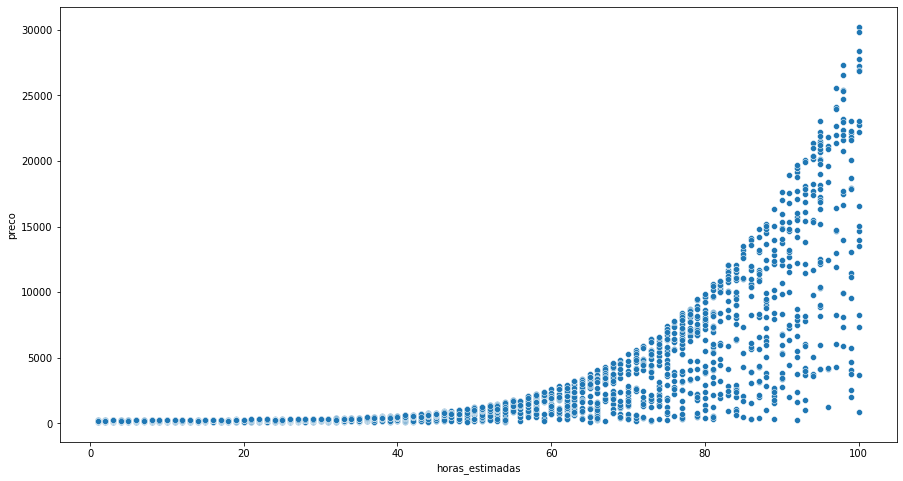

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.scatterplot(x = 'horas_estimadas', y = 'preco', data = dados)

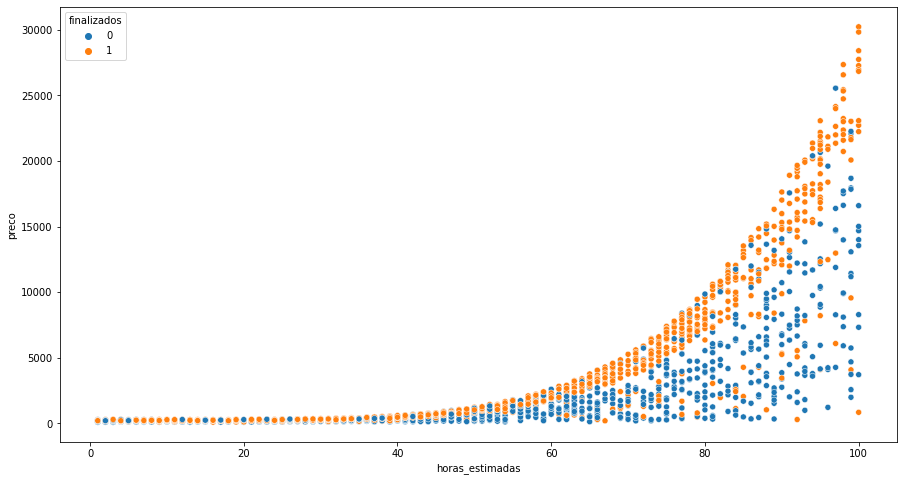

In [8]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'horas_estimadas', y = 'preco', hue = 'finalizados', data = dados)

In [9]:
x = dados[['horas_estimadas', 'preco']]
y = dados['finalizados']

In [10]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)

model = LinearSVC()

model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print(f'Neste modelo será treinado com {len(treino_x)} registros e testado com {len(teste_x)} registros.')
print(f'Taxa de acerto do modelo: {acuracia:.2f}%')

Neste modelo será treinado com 1617 registros e testado com 540 registros.
Taxa de acerto do modelo: 66.11%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [11]:
import numpy as np
previsoes_de_base = np.ones(len(teste_x))
acuracia = accuracy_score(teste_y, previsoes_de_base)*100
print(f'Taxa de acerto da baseline: {acuracia:.2f}%')

Taxa de acerto da baseline: 52.59%


# Modelo SVC

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


SEED = 5
# Deixa o default do seed como o valor da variavel do seed
np.random.seed(SEED)

model = SVC()

raw_x_train, raw_x_test, raw_y_train, raw_y_test = train_test_split(x, y, test_size = 0.25, stratify = y)
print(f'Foi treinado com {raw_x_train.shape[0]} e testado com {raw_x_test.shape[0]}')

scaler = StandardScaler()
scaler.fit(raw_x_train)
treino_x = scaler.transform(raw_x_train)
teste_x = scaler.transform(raw_x_test)


model.fit(treino_x, raw_y_train)
previsoes = model.predict(teste_x)

taxa_de_previsao = accuracy_score(raw_y_test, previsoes) * 100
print(f'Taxa de previsao {taxa_de_previsao:.2f}%')

Foi treinado com 1617 e testado com 540
Taxa de previsao 66.85%


In [13]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

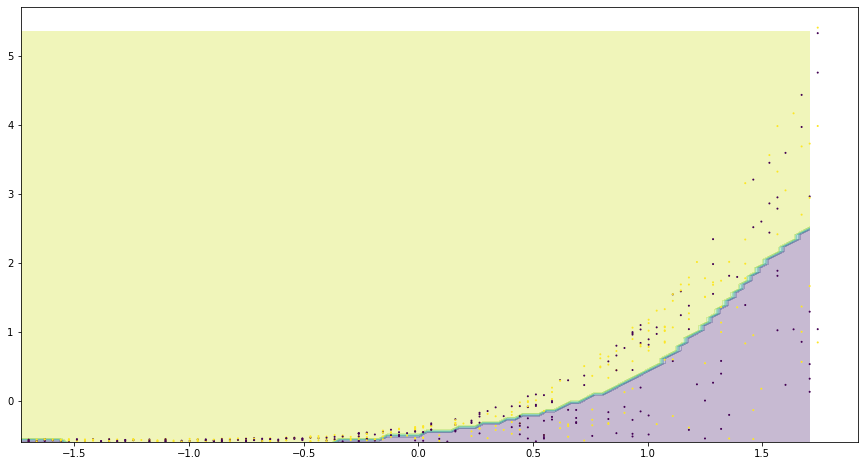

In [14]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)